In [32]:
import sys
import base_functions
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

In [33]:
Pixels = 256 # Cantidad de Píxeles del Detector.
N_Dopple = 2 # El archivo .raw genera dos imágenes, este número indica eso para promediarlas.
path_raw = "RAWs\\" # Directorio donde están los Raw.
path_txt = "Txts\\" # Directorio donde se ponen los Txt.
Step = "0" # Dato de geometry_config.in

In [34]:
name = "_Trans_15" # Acá se coloca el nombre del archivo concreto que se quiera analizar.
archive = path_raw + name + ".raw" 

In [35]:
brute_material = Data_Import(path_raw, name, Pixels)
images = Image_Generator(brute_material)
np.savetxt(path_txt + name + ".txt", images[0])
try: 
    np.savetxt(path_txt + name + "_FF.txt", images[1])
except IndexError:
        None

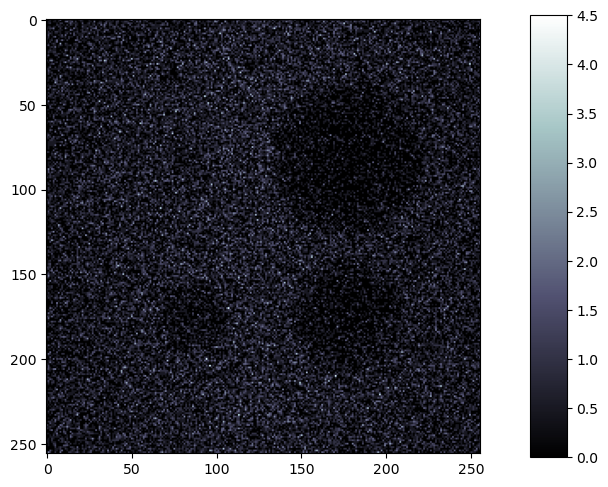

In [36]:
k = 0
fig, ax = plt.subplots(figsize=(7, 7))
map_ = ax.imshow(images[k], cmap = "bone")
fig.colorbar(map_, ax =ax , location='right', anchor=(0.5, 0.5), shrink=0.82, aspect=12)

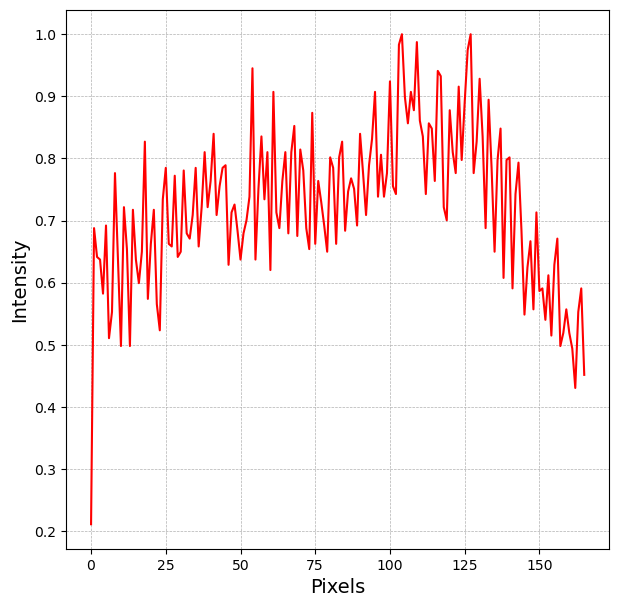

In [37]:
fig, ax = plt.subplots(figsize=(7, 7))
intensities = Intensity_Mean(images[k], Pixels - 90)
ax.plot(intensities, '-', color="red")
ax.set_xlabel("Pixels", fontsize = 14)
ax.set_ylabel("Intensity", fontsize = 14)
ax.grid(linestyle = '--', linewidth = 0.5)

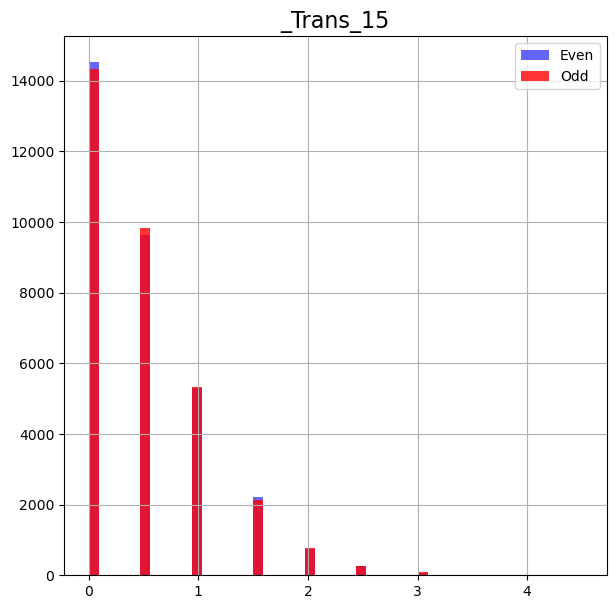

In [38]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.grid(True)


even_pixels = images[k][:,::2]
odd_pixels = images[k][:,1::2]
even_ = np.ravel(even_pixels)
odd_ = np.ravel(odd_pixels)

bin_size = 48
GNMe =ax.hist(even_, bins = bin_size, color="blue", label="Even", alpha=0.6)
GNMo =ax.hist(odd_, bins = bin_size, color="red", label="Odd", alpha=0.8)
ax.set_title("{}".format(name), fontsize=16)
ax.legend()

In [39]:
try:
    Frame = np.loadtxt(path_txt + "{}.txt".format(name))  # Carga las imágenes tomadas.
    FrameFF = np.loadtxt(path_txt + "{}_FF.txt".format(name))  # Carga la imagen del Flat Field.
except Exception as e:
    print(f"Error al cargar los archivos: {e}")
    sys.exit()

# Realizar la división evitando división por cero
N_Frame = np.divide(Frame, FrameFF, out = np.zeros_like(Frame), where = FrameFF != 0)
np.savetxt(path_txt + "Norm\\{}.txt".format(name), N_Frame, fmt = "%.6f")  

Error al cargar los archivos: Txts\_Trans_15_FF.txt not found.


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [ ]:
image_norm = np.genfromtxt(path_txt + "Norm\\{}.txt".format(name))

In [ ]:
fig, ax = plt.subplots(figsize = (7, 7))
ax.set_title("Corrected Image")
#im = ax.imshow(image_norm/np.max(image_norm), cmap="bone")
im = ax.imshow(image_norm[0:250, 0:250]/np.max(image_norm[0:250, 0:250]), cmap="bone")
fig.colorbar(im, ax = ax, location = 'right', anchor = (0.5, 0.5), shrink = 0.82, aspect = 12)

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
intensities = Intensity_Mean(image_norm, Pixels)
ax.plot(intensities, '-', color="red")
ax.set_xlabel("Pixels", fontsize = 14)
ax.set_ylabel("Intensity", fontsize = 14)
ax.grid(linestyle = '--', linewidth = 0.5)

In [ ]:
# SNR y CNR para la región de interes (ROI)

#BGx_bounds es una lista de un rango x_min a x_max donde se encuentre una sección del fondo (BackGound) (BG)
#BGx_bounds es una lista de un rango y_min a y_max donde se encuentre una sección del fondo (BackGound) (BG)

BGx_bounds, BGy_bounds = [0,70], [0,250]


#ROIx_bounds es una lista de listas de un rango x_min a x_max donde se encuentra el ROI correspondiente
#ROIy_bounds es una lista de listas de un rango y_min a y_max donde se encuentra el ROI correspondiente

ROIx_bounds, ROIy_bounds = [[90,170], [70,185], [100,155]], [[0,65], [75,180], [180,230]]

def SNR(image, ROI_num, ROIx_bounds, ROIy_bounds, BGx_bounds, BGy_bounds):

    SNR_ROIs = []

    roi_bg = image[BGy_bounds[0]:BGy_bounds[1], BGx_bounds[0]:BGx_bounds[1]]
    mean_bg = np.mean(roi_bg)
    std_bg = np.std(roi_bg)

    for i in range(ROI_num):

        roi = image[ROIy_bounds[i][0]:ROIy_bounds[i][1],
                          ROIx_bounds[i][0]:ROIx_bounds[i][1]]
        mean_roi = np.mean(roi)

        snr = np.abs(mean_roi - mean_bg) / std_bg
        SNR_ROIs.append(snr)
    
    return SNR_ROIs

def CNR(image, ROI_num, ROIx_bounds, ROIy_bounds, BGx_bounds, BGy_bounds):

    CNR_ROIs = []

    roi_bg = image[BGy_bounds[0]:BGy_bounds[1], BGx_bounds[0]:BGx_bounds[1]]
    mean_bg = np.mean(roi_bg)
    std_bg = np.std(roi_bg)

    for i in range(ROI_num):

        roi = image[ROIy_bounds[i][0]:ROIy_bounds[i][1],
                          ROIx_bounds[i][0]:ROIx_bounds[i][1]]
        mean_roi = np.mean(roi)
        std_roi = np.std(roi)

        cnr = np.abs(mean_roi - mean_bg) / np.sqrt(std_roi**2 + std_bg**2)
        CNR_ROIs.append(cnr)
    
    return CNR_ROIs

In [ ]:
SNR(images[k],3,ROIx_bounds, ROIy_bounds, BGx_bounds, BGy_bounds)

In [ ]:
CNR(images[k],3,ROIx_bounds, ROIy_bounds, BGx_bounds, BGy_bounds)